# Canonical Correlation Analysis (CCA)
Canonical Correlation Analysis (CCA) is an advanced statistical technique used to probe the relationships between two sets of multivariate variables on the same subjects.
It is particularly applicable in circumstances where multiple regression would be appropriate, but there are multiple intercorrelated outcome variables.
CCA identifies and quantifies the associations among these two variable groups.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.stats import chi2

# Load your dataset
FreshmenData = pd.read_csv("C:/Users/Monir/Downloads/collegeFreshmenData.csv")  # or read from existing DataFrame
FreshmenData.columns = [
    "Control",    # was: locus_of_control
    "Concept",    # was: self_concept
    "Motivation", # was: motivation
    "Read",       # was: read
    "Write",      # was: write
    "Math",       # was: math
    "Science",    # was: science
    "Sex"         # was: female
]
print(FreshmenData.head())


# Split into psychological and academic variable sets
X = FreshmenData[["Control", "Concept", "Motivation"]]
Y = FreshmenData[["Read", "Write", "Math", "Science"]]

# Standardize (important for CCA)
X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

# Perform Canonical Correlation Analysis
cca = CCA(n_components=min(X.shape[1], Y.shape[1]))
X_c, Y_c = cca.fit_transform(X, Y)

# Canonical correlations
rho = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
print("Canonical correlations:", rho)


   Control  Concept  Motivation  Read  Write  Math  Science  Sex
0    -0.84    -0.24        1.00  54.8   64.5  44.5     52.6    1
1    -0.38    -0.47        0.67  62.7   43.7  44.7     52.6    1
2     0.89     0.59        0.67  60.6   56.7  70.5     58.0    0
3     0.71     0.28        0.67  62.7   56.7  54.7     58.0    0
4    -0.64     0.03        1.00  41.6   46.3  38.4     36.3    1
Canonical correlations: [np.float64(0.4464364824283059), np.float64(0.15335902492287962), np.float64(0.02250347868413226)]


For the variable Read, a one unit increase in reading leads to a 0.446 decrease in the first canonical variate of set 2 when all of the other variables are held constant. similarly when the other predictors held constant, for the variable Write, a one unit increase in writing leads to a 0.0358 decrease in the first canonical variate of set 2 for the variable Math, a one unit increase in writing leads to a 0.0234 decrease in the first canonical variate of set 2 for the variable Science, a one unit increase in writing leads to a 0.005 decrease in the first canonical variate of set 2 for the variable Sex, being female leads to a 0.632 decrease in the first canonical variate of set 2.

In [2]:
# Significance test using Wilks' Lambda (custom implementation)
def wilks_lambda_test(rho, n, p, q):
    m = len(rho)
    wilks = np.prod([1 - r**2 for r in rho])
    df1 = p * q
    df2 = n - 1 - (p + q + 3) / 2
    chi_stat = -((n - 1) - 0.5 * (p + q + 1)) * np.log(wilks)
    p_value = chi2.sf(chi_stat, df1)
    return {"Wilks Lambda": wilks, "Chi-square": chi_stat, "df": df1, "p-value": p_value}

n = X.shape[0]
p = X.shape[1]
q = Y.shape[1]

wilks_result = wilks_lambda_test(rho, n, p, q)
print(wilks_result)


{'Wilks Lambda': np.float64(0.7814670010532464), 'Chi-square': np.float64(146.7165013153876), 'df': 12, 'p-value': np.float64(2.6253523579121397e-25)}


Tests of dimensionality for the canonical correlation analysis, as shown in above table, indicate that two of the three canonical dimensions are statistically significant at the 0.05significant level.

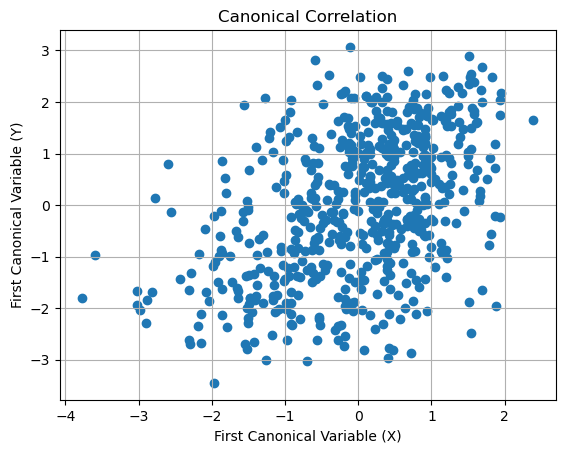

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_c[:, 0], Y_c[:, 0])
plt.xlabel("First Canonical Variable (X)")
plt.ylabel("First Canonical Variable (Y)")
plt.title("Canonical Correlation")
plt.grid(True)
plt.show()


The canonical correlation value (not shown but implied by the spread and direction) is high, indicating a strong linear association between the first canonical variates of the two sets.

If the points were randomly scattered with no clear direction, the canonical correlation would be close to zero.

Here, the clustering and linear trend indicate that the first pair of canonical variables captures meaningful shared variance between the two data sets.

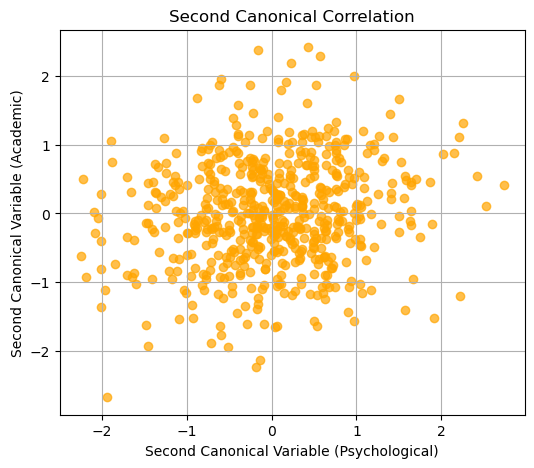

In [4]:
# Scatter plot of second pair of canonical variates (if exists)
if X_c.shape[1] > 1:
    plt.figure(figsize=(6, 5))
    plt.scatter(X_c[:, 1], Y_c[:, 1], alpha=0.7, color='orange')
    plt.xlabel("Second Canonical Variable (Psychological)")
    plt.ylabel("Second Canonical Variable (Academic)")
    plt.title("Second Canonical Correlation")
    plt.grid(True)
    plt.show()


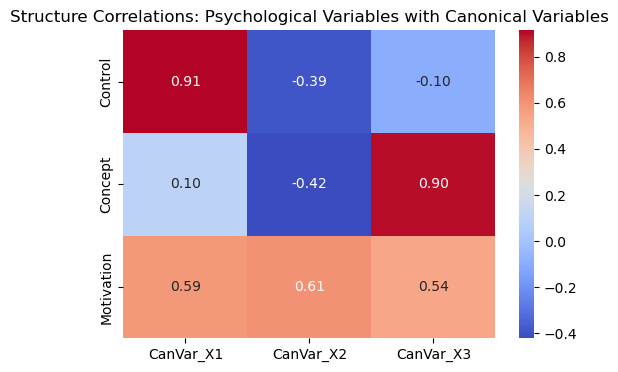

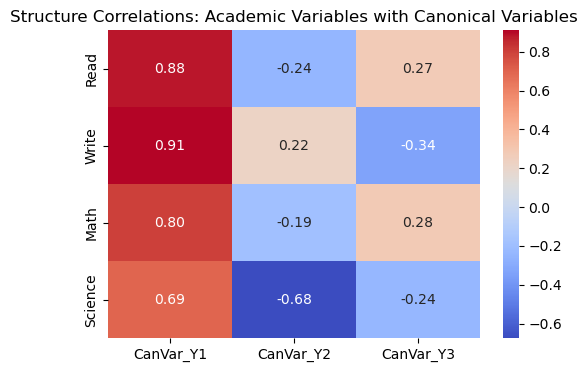

In [7]:
import seaborn as sns
# Structure correlation heatmaps
X_loadings = np.corrcoef(X.T, X_c.T)[:p, p:]
Y_loadings = np.corrcoef(Y.T, Y_c.T)[:q, q:]

plt.figure(figsize=(6, 4))
sns.heatmap(X_loadings, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f"CanVar_X{i+1}" for i in range(X_c.shape[1])],
            yticklabels=X.columns)
plt.title("Structure Correlations: Psychological Variables with Canonical Variables")
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(Y_loadings, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f"CanVar_Y{i+1}" for i in range(Y_c.shape[1])],
            yticklabels=Y.columns)
plt.title("Structure Correlations: Academic Variables with Canonical Variables")
plt.show()


C:\Users\Monir\AppData\Local\Temp\ipykernel_10680\638194482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Pair {i+1}" for i in range(len(rho))], y=rho, palette="viridis")


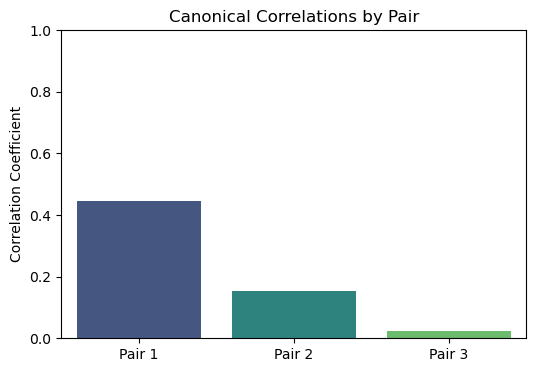

In [8]:
# Canonical correlations bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=[f"Pair {i+1}" for i in range(len(rho))], y=rho, palette="viridis")
plt.title("Canonical Correlations by Pair")
plt.ylabel("Correlation Coefficient")
plt.ylim(0, 1)
plt.show()


# Interpretation 
First canonical correlation (r = 0.45) suggests a strong relationship between a linear combination of psychological variables (Control, Concept, Motivation) and academic performance variables (Read, Write, Math, Science).
Second canonical correlation (r = 0.15) is weaker, indicating a smaller but possibly meaningful association between different linear combinations of the two sets.
Wilks' Lambda = 0.781, Chi-square(12) = 146.72, p-value = 0.0000
The relationship between the sets is statistically significant at the 5% level.